# Genome assembly project

## Reads

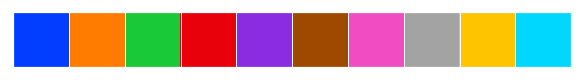

In [113]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re
from functools import reduce
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.palplot(sns.color_palette("bright", 10))
sns.set(color_codes=True)

In [3]:
genome = pd.read_csv('/home/nikita/Documents/work/git_projects/GenomeAssembly/data/text.txt', sep = '\n')

In [4]:
# С каким алфавитом имеем дело?
print('Alphabet is the following: ' + str(set(genome.loc[0].values[0].strip())))

Alphabet is the following: {'N', 'T', 'B', 'O', 'S', 'I'}


In [5]:
alphabet = {'S', 'T', 'O', 'I', 'B', 'N'}

In [6]:
def give_character_content_1(genome, alphabet):
    '''
    Operates with reads
    One way: Per read frequncy
    '''
    content = {'S':0, 'T':0, 'O':0, 'I':0, 'B':0, 'N':0}
    for index, read in genome.iterrows():
        read = read.values[0]
        for latter in alphabet:
            tmp = read.count(latter)/len(read)
            content[latter] += tmp
    content = {key:round(value/20087, 3) for key, value in content.items()}
    return content

In [7]:
def give_character_content_2(genome, alphabet):
    '''
    Operates with reads
    Other way: All reads frequncy
    '''
    freq = {'S':0, 'T':0, 'O':0, 'I':0, 'B':0, 'N':0}
    content = str()
    for index, read in genome.iterrows():
        read = read.values[0]
        content += read
    for latter in alphabet:
        value = content.count(latter)/len(content)
        freq[latter] = value
    return freq
    

In [8]:
# Частоты "нуклеотидов":
print(give_character_content_1(genome, alphabet)) 
print(give_character_content_2(genome, alphabet))

{'S': 0.163, 'T': 0.178, 'O': 0.156, 'I': 0.17, 'B': 0.163, 'N': 0.169}
{'S': 0.1633294920289853, 'T': 0.1781902478281364, 'O': 0.15637730958305396, 'I': 0.16984501176144617, 'B': 0.163297062355151, 'N': 0.16896087644322716}


In [10]:
# Посмотрим на распределение длин ридов. Возможно, некоторые стоит убрать.
sizes = [len(read.values[0].strip()) for index, read in genome.iterrows()]
summary = {'Min':min(sizes),
           'Max':max(sizes),
           'number of reads':len(sizes),
           'length':sum(sizes),
           'Mean':sum(sizes)/len(sizes)}
print(summary)

{'Min': 110, 'Max': 200, 'number of reads': 20087, 'length': 3515299, 'Mean': 175.00368397471001}


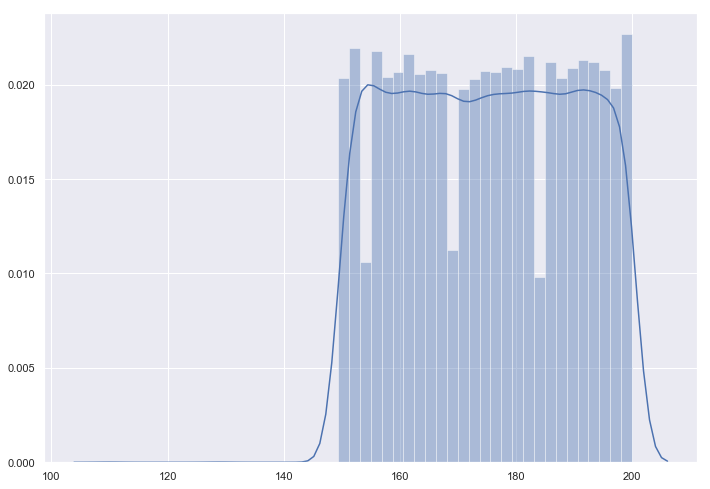

In [13]:
# Нарисуем распределние длин ридов:
sns.distplot(sizes)

### Questions:
1) Are they pair-end reads or not?

2) What is average Chargaff rule bias?

1.5%

3) Is it circular? -> de Brujn

# Assembled

## general statistics

In [14]:
# Тут у нас хранятся три хромосомы/генома/сборки
# Наверное, следует их анализировать по отдельности

all_genomes = list()

with open('/home/nikita/Documents/work/git_projects/GenomeAssembly/data/assembled.txt', 'r') as assemble:
    for genome in assemble:
        all_genomes.append(genome)
        

In [15]:
# Всего у нас в списке шесть строк
len(all_genomes)

6

In [16]:
# Вероятно, это прясая и обратная цепь
print(len(all_genomes[0]))
print(len(all_genomes[1]))
print(len(all_genomes[2]))
print(len(all_genomes[3]))
print(len(all_genomes[4]))
print(len(all_genomes[5]))

300454
300454
402937
402937
300001
300001


In [17]:
def give_character_content_str(genome):
    freq = {'S':0, 'T':0, 'O':0, 'I':0, 'B':0, 'N':0}
    for latter in freq:
        value = genome.count(latter)/len(genome)
        freq[latter] = value
    return freq

In [18]:
# Посмотрим на частоту нуклеотидов на разных цепях
print(give_character_content_str(all_genomes[0]))
print(give_character_content_str(all_genomes[1]))
print(give_character_content_str(all_genomes[2]))
print(give_character_content_str(all_genomes[3]))
print(give_character_content_str(all_genomes[4]))
print(give_character_content_str(all_genomes[5]))

{'S': 0.15469922184427568, 'T': 0.17780425622557863, 'O': 0.15239604065847018, 'I': 0.1611028643319776, 'B': 0.17614676456296138, 'N': 0.17784752408022525}
{'S': 0.17614676456296138, 'T': 0.17784752408022525, 'O': 0.15239604065847018, 'I': 0.17780425622557863, 'B': 0.15469922184427568, 'N': 0.1611028643319776}
{'S': 0.14659611800355887, 'T': 0.18206816450214303, 'O': 0.16082663046580484, 'I': 0.1640901679418867, 'B': 0.16884029016943095, 'N': 0.1775761471396273}
{'S': 0.16884029016943095, 'T': 0.1775761471396273, 'O': 0.16082663046580484, 'I': 0.18206816450214303, 'B': 0.14659611800355887, 'N': 0.1640901679418867}
{'S': 0.16001279995733347, 'T': 0.1764327452241826, 'O': 0.15459281802393993, 'I': 0.15491615027949907, 'B': 0.17749274169086102, 'N': 0.17654941150196166}
{'S': 0.17749274169086102, 'T': 0.17654941150196166, 'O': 0.15459281802393993, 'I': 0.1764327452241826, 'B': 0.16001279995733347, 'N': 0.15491615027949907}


In [ ]:
# Можем заметить стренд-специфическую комплиментарность, но надо проверить с помощью к-меров.

## Genome 1

### Reveal complementary

In [19]:
def get_nc_content(genome):
    '''
    Operates with whole chromosome
    '''
    freq = {'S':0, 'T':0, 'O':0, 'I':0, 'B':0, 'N':0}
    length = len(genome)
    for key, value in freq.items():
        freq[key] = genome.count(key)/length
    return(freq)    

In [21]:
get_nc_content(all_genomes[0])

{'S': 0.15469922184427568,
 'T': 0.17780425622557863,
 'O': 0.15239604065847018,
 'I': 0.1611028643319776,
 'B': 0.17614676456296138,
 'N': 0.17784752408022525}

In [22]:
get_nc_content(all_genomes[1])

{'S': 0.17614676456296138,
 'T': 0.17784752408022525,
 'O': 0.15239604065847018,
 'I': 0.17780425622557863,
 'B': 0.15469922184427568,
 'N': 0.1611028643319776}

In [ ]:
# Но это следует проверить:

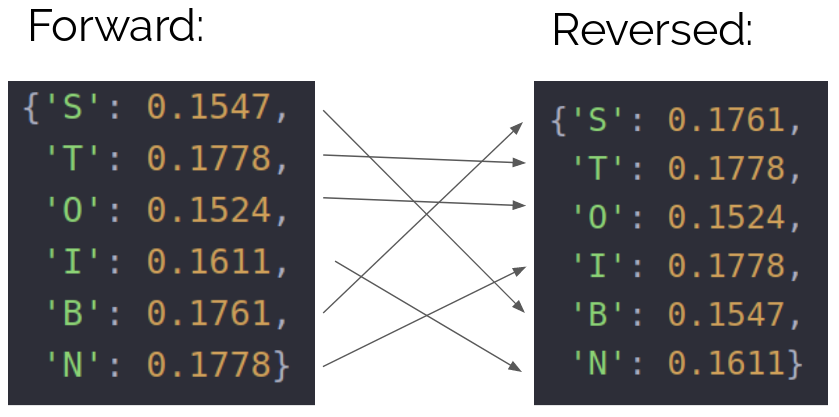

### K-mers

In [52]:
# Нужна для поиска мотивов + по к-мерам будем выявлять комплиментарность
def build_k_mer(str,k):
    '''
    Генерит к-меры из строки
    '''
    return [str[i:k+i] for i in range(0,len(str)-k+1)]

In [53]:
k_mers = build_k_mer(all_genomes[0], 5)

In [54]:
# Почему k=5?
# Чтобы ответить на этот вопрос, построим графики, где k=3...10
# И где наибольшие различия между первым и вторым - наш вариант
# Но нужно нормализовать, ибо более короткие к-меры будут возникать чаще

In [55]:
def k_mer_comparison(genome):
    comparison = list()
    for k in range(3, 11):
        k_mers = build_k_mer(genome, k)
        distr = dict()
        for k_mer in k_mers:
            if k_mer not in distr:
                distr[k_mer] = 1
            else:
                distr[k_mer] += 1
        listofTuples = sorted(distr.items(), key=lambda x: x[1])
        s = sum([x[1] for x in listofTuples[-40:-1]])
        comparison.append((k, listofTuples[-1][1]/s))
    return comparison



In [56]:
comparison = k_mer_comparison(all_genomes[0])

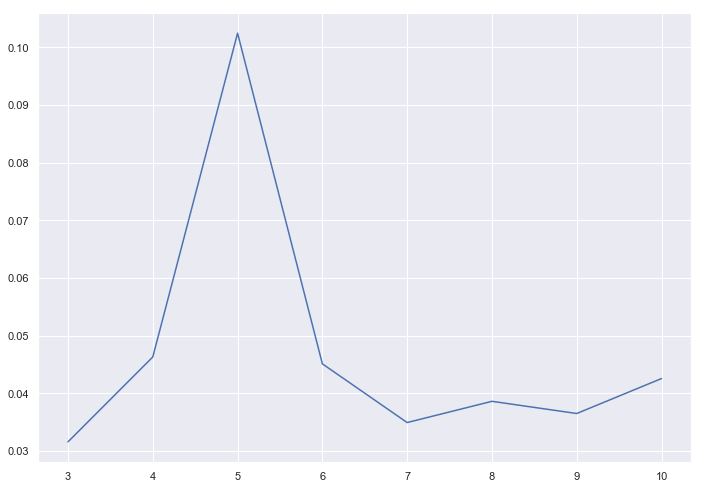

In [57]:
x = [i[0] for i in comparison]
y = [i[1] for i in comparison]
sns.lineplot(x=x, y=y)

In [58]:
# Поэтому 5-меры для данного генома наиболее информативны

In [59]:
# Вернемся к нашим баранам. Мы определились с окном. к = 5
# Строим таблицу частот
distr = dict()
for k_mer in k_mers:
    if k_mer not in distr:
        distr[k_mer] = 1
    else:
        distr[k_mer] += 1

In [60]:
# Сортируем по количеству вхождений
listofTuples = sorted(distr.items(), key=lambda x: x[1])
distr_values = list(map(lambda x: x[1], listofTuples))

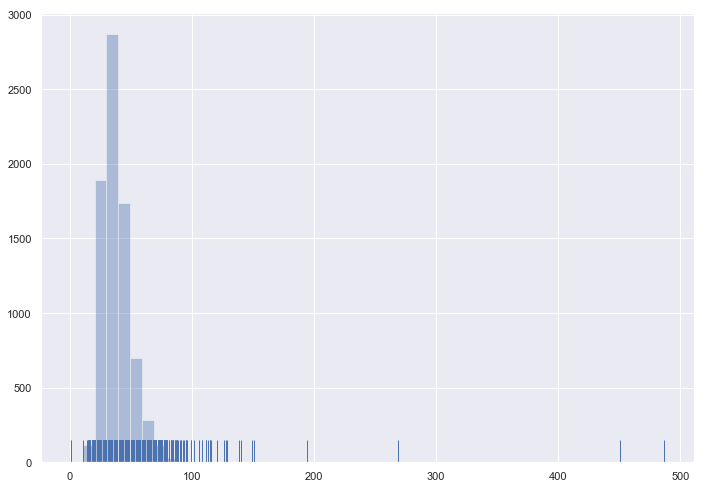

In [61]:
sns.distplot(distr_values, rug=True, kde=False)

In [36]:
# Now, lets calculate p_value and figure out how many motifs do we have
# Calculate pval for each kmer in list
p_val_distr = list()
for i in distr_values:
    new_list = list(map(lambda x: x if x >= i else 'nan', distr_values))
    p_val = len([x for x in new_list if str(x) != 'nan'])/len(distr_values)
    p_val_distr.append(p_val)
# Now lets see how many kmers a lower than 0.05
p_val_distr[-40:-1]
# Approximately 37-40 (last three are more than 0.05)

[0.005271955767005272,
 0.0050147871930050145,
 0.0050147871930050145,
 0.004757618619004758,
 0.004757618619004758,
 0.004757618619004758,
 0.004371865758004372,
 0.004243281471004243,
 0.0041146971840041145,
 0.0041146971840041145,
 0.0038575286100038576,
 0.003728944323003729,
 0.0036003600360036,
 0.0036003600360036,
 0.0036003600360036,
 0.0032146071750032146,
 0.003086022888003086,
 0.003086022888003086,
 0.002828854314002829,
 0.0027002700270027003,
 0.0025716857400025716,
 0.0025716857400025716,
 0.0023145171660023146,
 0.0023145171660023146,
 0.0020573485920020573,
 0.0019287643050019288,
 0.0019287643050019288,
 0.0016715957310016716,
 0.001543011444001543,
 0.0014144271570014145,
 0.0012858428700012858,
 0.0011572585830011573,
 0.0010286742960010286,
 0.0009000900090009,
 0.0007715057220007715,
 0.0006429214350006429,
 0.0005143371480005143,
 0.00038575286100038574,
 0.00025716857400025716]

In [62]:
# Т.е. около сорока к-меров потенциально неслучайно собрались.
# Вот они:
listofTuples[-37:-1]

[('IIIOO', 88),
 ('SISII', 88),
 ('TOOSN', 88),
 ('SBNIN', 89),
 ('IIISI', 90),
 ('NBNTT', 91),
 ('OSNTT', 91),
 ('NINIO', 93),
 ('ISIII', 94),
 ('TBTTT', 95),
 ('OTTTO', 95),
 ('IIIIS', 95),
 ('ITTTO', 96),
 ('TTOIS', 99),
 ('IIIII', 99),
 ('OSNTN', 102),
 ('BNTTT', 106),
 ('STTTO', 108),
 ('NINIS', 108),
 ('NINIT', 112),
 ('TTOIT', 112),
 ('TTOIB', 113),
 ('IBNIN', 115),
 ('TTTTO', 115),
 ('TTOIN', 116),
 ('NINII', 121),
 ('NININ', 126),
 ('NINIB', 128),
 ('BTTTO', 129),
 ('BBNIN', 139),
 ('NBNIN', 140),
 ('NTTTO', 149),
 ('TBNIN', 151),
 ('TTOTS', 194),
 ('OOSNT', 269),
 ('TTTOI', 451)]

In [34]:
# При этом они не то чтобы очень перекрываются
# А если исходя из частоты возникновения н/д. посмотреть кто из перечисленных имеет наименьшую вероятность собраться
# с имеющимся набором нд-ов

In [39]:
# Для каждого из 37-ми мотивов смотрим, какова вероятность собраться таким составом
# Возможно, нам это что-то скажет.
distr_kmers = [i[0] for i in listofTuples[-37:-1]]
freq = get_nc_content(all_genomes[0])
result = list()
for i in distr_kmers:
    res_freq = list()
    for j in i:
        res_freq.append(float(freq[j]))
    multiply = reduce(lambda x, y: x*y, res_freq)
    result.append((i, multiply))

# Сортируем по значению р-val:
result.sort(key=lambda tup:tup[1])

In [40]:
result

[('IIIOO', 9.710847946399747e-05),
 ('SISII', 0.00010006588585499018),
 ('IIISI', 0.00010420802794588949),
 ('IIIIS', 0.00010420802794588949),
 ('ISIII', 0.0001042080279458895),
 ('IIIII', 0.00010852163047962208),
 ('OOSNT', 0.0001136123317424768),
 ('TOOSN', 0.00011361233174247681),
 ('TTOIS', 0.0001200741112034278),
 ('NINIO', 0.00012510534214676386),
 ('NINIS', 0.0001269960754560493),
 ('OTTTO', 0.00013054908316174825),
 ('NINII', 0.00013225296980151914),
 ('STTTO', 0.00013252208843710274),
 ('TTOTS', 0.00013252208843710274),
 ('OSNTT', 0.0001325543370827858),
 ('OSNTN', 0.00013258659357602969),
 ('TTOIB', 0.0001367212190475519),
 ('ITTTO', 0.00013800772738187435),
 ('TTOIT', 0.00013800772738187435),
 ('TTTOI', 0.00013800772738187435),
 ('TTOIN', 0.0001380413109327703),
 ('SBNIN', 0.0001388550594462431),
 ('NINIB', 0.00014460284633037763),
 ('IBNIN', 0.00014460284633037766),
 ('NINIT', 0.00014596351856740675),
 ('NININ', 0.00014599903812379504),
 ('BTTTO', 0.00015089498727291785),
 

In [ ]:
# Интерпретация на читателе...

In [78]:
# Теперь, давайте сосредоточимся только на этих двух к-мерах:
# 'OOSNT', 269
# 'TTTOI', 451

In [79]:
# Что мы можем сделать с этими мотивами?
# 1) Посторить Consensus sequence
# 2) Посмотреть как скоррелированно окружение
# 3) Можно попытаться скластеризовать к-меры. Хз, как.

In [41]:
# Строим pLogo plot, но в виде barplot-а
pattern = '[STOBIN][STOBIN]TTTOI[STOBIN][STOBIN]'
maps = re.findall(pattern, all_genomes[0])
freq = {'0':{'S':0,'T':0,'O':0,'B':0,'I':0,'N':0},
        '1':{'S':0,'T':0,'O':0,'B':0,'I':0,'N':0},
        '-2':{'S':0,'T':0,'O':0,'B':0,'I':0,'N':0},
        '-1':{'S':0,'T':0,'O':0,'B':0,'I':0,'N':0}}

In [42]:
for kmer in maps:
    for i in (0,1,-2,-1):
        freq[str(i)][kmer[i]] += 1

In [43]:
# Таблица частот для окружения к-мера (+- 2 нд)
freq

{'0': {'S': 68, 'T': 88, 'O': 71, 'B': 78, 'I': 58, 'N': 88},
 '1': {'S': 68, 'T': 70, 'O': 64, 'B': 78, 'I': 70, 'N': 101},
 '-2': {'S': 74, 'T': 80, 'O': 54, 'B': 86, 'I': 62, 'N': 95},
 '-1': {'S': 78, 'T': 73, 'O': 59, 'B': 92, 'I': 66, 'N': 83}}

In [ ]:
# Распределение по частоте вхождения мотива в геном

In [81]:
def motif_density(genome, step, motif):
    '''
    Бегает по геному с окном step и считает кол-во вхождений в данный участок
    '''
    density = list()
    try:
        for i in range(0,len(genome)+1,step):
            window = genome[i:i+step+1]
            n = len(re.findall(motif, window))
            if n != 0:
                density.append(len(re.findall(motif, window)))
    except:
        return density
    return density

In [82]:
def give_three_motif_density(genome, list_with_3_motifs, window = len(genome)//10):
    three_distr = dict()
    for motif in list_with_3_motifs:
        x = motif_density(genome, window, motif)
#         if len(x) == 10:
        three_distr[motif] = x
#         else:
#             x.append(0)
#             three_distr[motif] = x
    return three_distr

In [100]:
# Список с тремя наиболее частыми к-мерами
l = [x[0] for x in reversed(listofTuples[-4:-1])]
# Но все же будем по одному плотить:
x = give_three_motif_density(all_genomes[0], ['TTTOI'], window = 3000)

In [101]:
def generate_df(distr):
    k = [key for key in distr]
    from collections import OrderedDict
    y = [i for i in range(len(distr[k[0]]))]
    d = OrderedDict([ ('window', y),
          ('first', distr[k[0]])])
    kmers_df = pd.DataFrame.from_dict(d)
    return kmers_df

In [102]:
df = generate_df(x)

In [103]:
kmers_df = pd.melt(df, id_vars=['window'],
                   value_vars=['first'],
                   var_name='Kmer_number',
                   value_name='Count')
kmers_df

,window,Kmer_number,Count
0,0,first,11
1,1,first,10
2,2,first,12
3,3,first,11
4,4,first,8
5,5,first,7
6,6,first,10
7,7,first,10
8,8,first,8
9,9,first,9


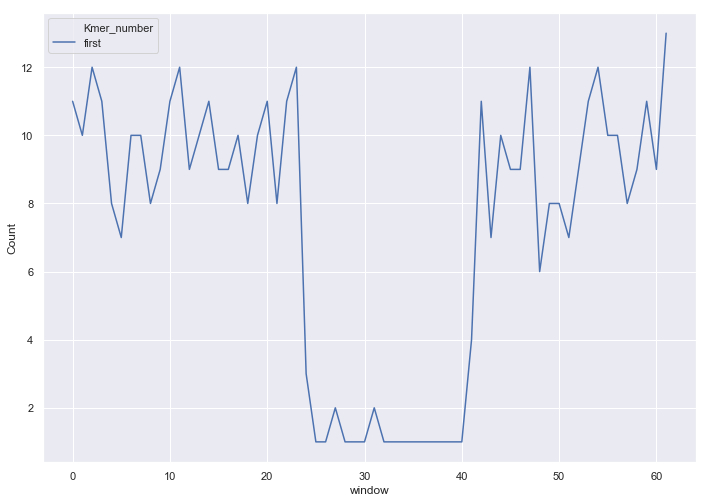

In [104]:
# График распределения к-мера TTTOI в прямой цепи первого генома:
ax = sns.lineplot(x="window", y="Count", hue="Kmer_number", data=kmers_df)

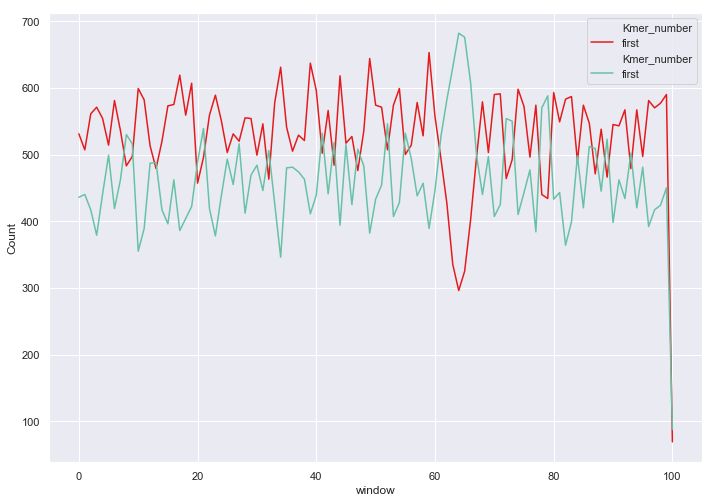

In [118]:
# T and S distribution on first chromosome (forward string):
for i, j in zip(['T', 'S'], [1, 2]):
    x = give_three_motif_density(all_genomes[0], [i], window = 3000)
    df = generate_df(x)
    kmers_df = pd.melt(df, id_vars=['window'],
                       value_vars=['first'],
                       var_name='Kmer_number',
                       value_name='Count')
    ax = sns.lineplot(x="window", y="Count", hue="Kmer_number", data=kmers_df, palette=f"Set{j}")

### Alignment

In [70]:
# Import pairwise2 module
from Bio import pairwise2

# Import format_alignment method
from Bio.pairwise2 import format_alignment

f = all_genomes[2][30000:31000]
s = all_genomes[0][0:1000]


# Get a list of the local alignments between the two sequences ACGGGT and ACG
# No parameters. Identical characters have score of 1, else 0.
# No gap penalties.
alignments = pairwise2.align.localxx(f, s)


In [71]:
alignments

[('-NON-T-----TN--------T----BTT-S-SOOB-BN---STBIB----T---N-N-TN--TIITNOI-ITOOBIOOSNSSO--TB-IN---BNTB--B-T--TO-SIINBOBBSNO-TTNBB---NSISS-O--S-NB---SN-B--NNINOSIBBNBNSTSTIBNSOT--OIBOBISBNBNISS---ITB--O--NTITB--OTS--BIIINOBIS-INNISTSBBTTTSBIOTN-NT-N--TII--TOITBIOSSONOB---O--NSOSS---NBNBSSBO-OBN--BBNTNBIIINST-BO-TSOBNSN--NT---S--I-SI-B--N----NTNIBSTBTTS---S--SNBTI---NTN-B--B-IN-------NNI-BSNOITOBOTNBBSNOI-N-SOOIT--TTN-N--TNTI--ITIBS--B--IO-IBBBBNTOS-BTBISSS-BOBN--S--O-TO-T-TO-ININ-----NB-TO---IB--ONOS-NO-TNBISBTTNN-OII-T-BTINSSN-NO-BOO-OINBO--IINITOBTNTTIISN---IO----BOO-BTI-----IBNIOTNNNTNTNNTNTIITNOB-N-B-BN---TBTSTI--N--TT-BTON-BOI-OTONN--TOB-OSN-BTTISO-SNOT-OTN-SIINI-NTNTBOIBIBSI-TBS-TTNSOII-BNBISTO--OB-NSTT-B-NT-T--TNNTNTIITB-BTN----S-OT-TI--OS--NOTT-S-SBITTNIB-------OIIBBIBB-OIIT--SONBBB-S-O-I-B---BOTSTT-ONNNONIIOTIIS-NIIIOI-NBOTOTISB--T---OS---TTO-NINB-ISSIBNN-TN--NT---NTIIT--ON-STNBSIOI--ITOTSN--SI-NO-BO-BTS-BS--NNB-T-NTSBT-SOTTBOTB--SBT--T--I---SBONOBBB---B--NBO-BOBSTISOTOBBTI-TONB

In [125]:
def rev_compliment_forw(first):
    first_rev = first[::-1].strip()
    alphabet = {'S':'B', 'N':'T', 'T':'I',
                'B':'S', 'I':'N', 'O':'O'}
    q_new = ''
    for i in first_rev:
        q_new += alphabet[i]
    return q_new

In [144]:
fst = rev_compliment_forw(all_genomes[0])
second = all_genomes[1].strip()

In [145]:
second == fst

False

In [146]:
fst = rev_compliment_forw(all_genomes[4])
second = all_genomes[5].strip()

In [147]:
fst == second

True